### Differences between Negative Binomial, Geometric and Poisson distributions, and relation to Lloyd-Smith et al paper

The major recurring issue with this project is that I continue to not fully grasp how exactly the Negative Binomial distribution can be used with the data.

I have determined that the notion of individual reproductive number $ v $ won't be modelled, since it only is used to generate an offspring distribution. The data we have already has individual variation in it, so we should be able to just fit an offspring distribution to it. We need to find a candidate for the offspring distribution. Intuition says it should be the Negative Binomial distribution, which is a defacto distributon to use with tick aggregation data. However, the data is different than regular tick aggregation data in the sense that we "follow the tick". So, we should test fitting different discrete distributions to the data and then apply goodness of fit tests to each of those.

It's also unclear if $ R_0, k $ are directly used in the distributions that Lloyd-Smith et al use, or, if they are extracted using the Method of Moments. And I'm completely lost as to how they fit $ k $, since they fit the recipricol of $ k $, or $ \alpha = 1/k $

To address these concerns, I think the best thing to do would be to obtain the exact datasets that Lloyd-Smith and others used, so that I can reproduce their work of fitting distributions to those contact tracing networks, and then once I have obtained the same fitted parameters, I can be sure I'm on the right path.

[]

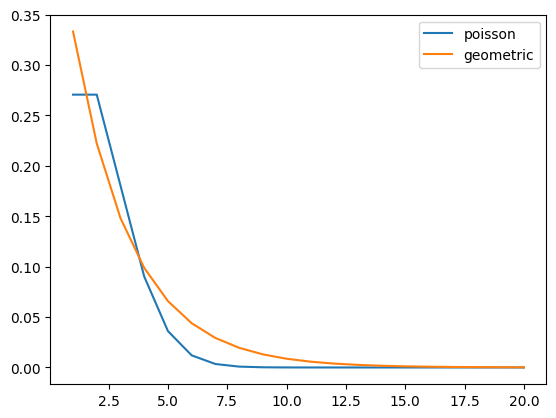

In [55]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(start=1,stop=20,num=20)

R_0 = 2

poisson = stats.poisson.pmf(x, mu=R_0)
p_geom=(1/(1+R_0))
geom = stats.geom.pmf(x, p_geom)
plt.plot(x,poisson, label="poisson")
plt.plot(x,geom, label="geometric")
plt.legend()
plt.plot()


[]

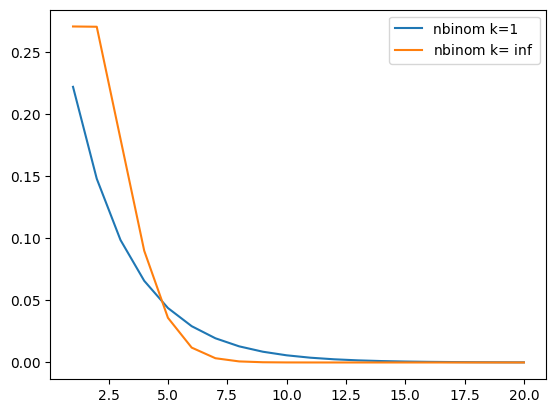

In [63]:
k = 1
p_nbinom = 1/(1 + (R_0/k))
nbinom_k1 = stats.nbinom.pmf(x, n=k, p=p_nbinom)

k = 10**15 #np.inf doesn't seem to work
p_nbinom = 1/(1 + (R_0/k))
nbinom_kinf = stats.nbinom.pmf(x, n=k, p=p_nbinom)

plt.plot(x,nbinom_k1, label="nbinom k=1")
plt.plot(x,nbinom_kinf, label="nbinom k= $\inf$")
plt.legend()
plt.plot()

[]

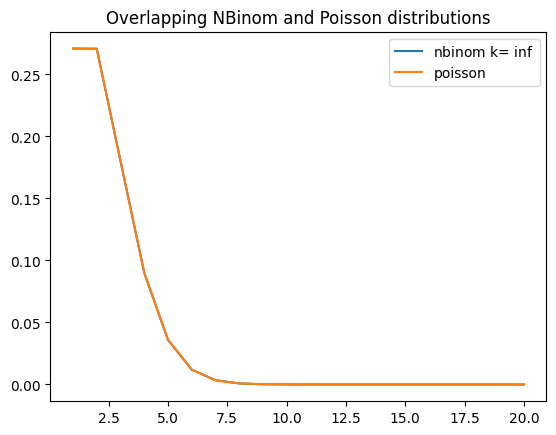

In [60]:
plt.plot(x,nbinom_kinf, label="nbinom k= $\inf$")
plt.plot(x,poisson, label="poisson")
plt.title("Overlapping NBinom and Poisson distributions")
plt.legend()
plt.plot()

[]

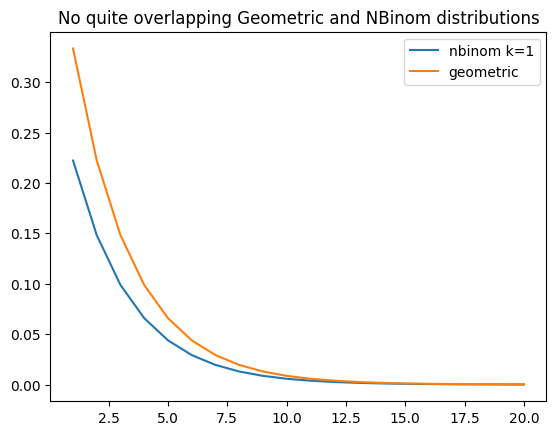

In [62]:
plt.plot(x,nbinom_k1, label="nbinom k=1")
plt.plot(x,geom, label="geometric")
plt.title("No quite overlapping Geometric and NBinom distributions")
plt.legend()
plt.plot()
